#### ML Modeling

In [1]:
import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from freeman.plt_setting import plt_settings
from freeman.evaluation import regression_evaluation, f_importances, plot_actual_pred
from freeman.aiddd.data_manager import read_data

plt_settings()

In [2]:
df_X = read_data('2a-all-scaled-X', process_seq='4th')
df_y = read_data('2a-all-y', process_seq='4th')

In [3]:
training_columns = df_X.columns

X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.2)
    
X_test_copy = X_test.copy()

In [4]:
SEED = 123
ml_models = {
    'LIN': LinearRegression(),
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [5]:
def diff_ytest_pred(model_key, test, pred):
    test = test['total_cons_cost'].values.tolist()
    pred = pred.tolist()
    if isinstance(pred[0], list):
        pred = [item for sub in pred for item in sub]
    max_test = max(test)
    loop_size = len(test)
    result_mape = []
    result_max_mape = []
    for idx in range(loop_size):
        new_mape = abs((test[idx] - pred[idx])/test[idx])*100
        new_max_mape = abs((test[idx] - pred[idx])/(test[idx]+max_test))*100
        result_mape.append(new_mape)
        result_max_mape.append(new_max_mape)
    X_test_copy[f'{model_key}_mape'] = result_mape
    X_test_copy[f'{model_key}_max_mape'] = result_max_mape

In [6]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    diff_ytest_pred(model_key, y_test, predictions)
    try:
        f_importances(model, training_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

Evaluation: LIN
R2_SCORE: -353725762191507362676736.000000, MAPE: 1309079553070.892578, MSE: 3485906259967796572769915371008294912.000000, RMSE: 1867058183337572608.000000, MAE: 43274759282830600.000000
`LIN` object has no attribute `feature_importances_`


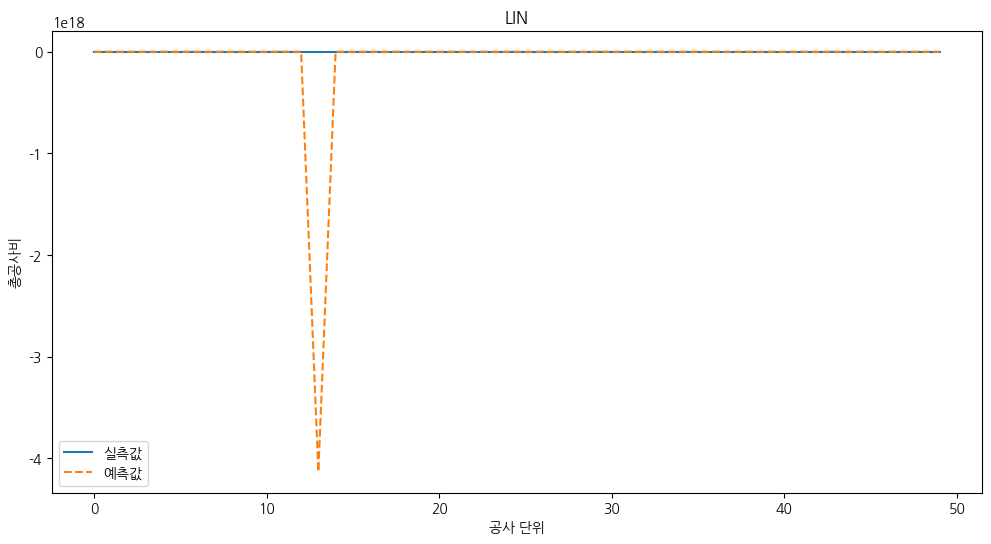

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.317e+16, tolerance: 8.511e+12
  model = cd_fast.enet_coordinate_descent(


Evaluation: LASSO
R2_SCORE: 0.679881, MAPE: 17.895022, MSE: 3154718234588.771484, RMSE: 1776152.649574, MAE: 871380.900641
`LASSO` object has no attribute `feature_importances_`


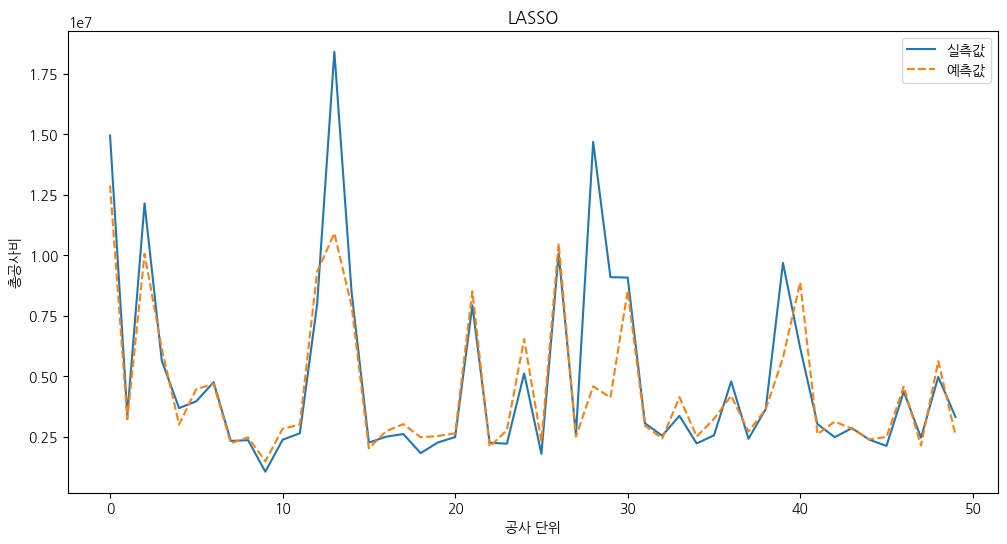

Evaluation: RIDGE
R2_SCORE: 0.679264, MAPE: 17.860117, MSE: 3160801710988.223145, RMSE: 1777864.367996, MAE: 870674.865841
`RIDGE` object has no attribute `feature_importances_`


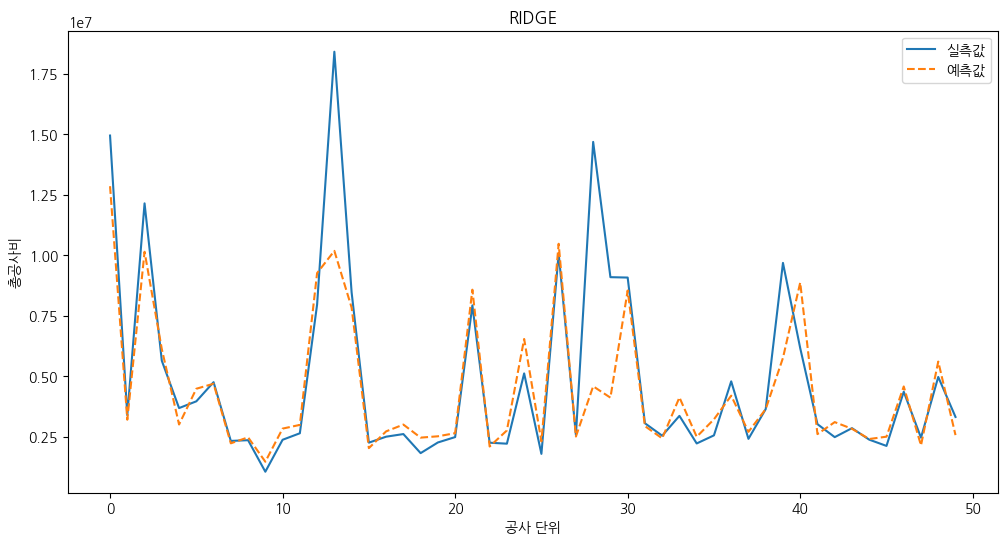

Evaluation: KNR
R2_SCORE: 0.566261, MAPE: 19.194828, MSE: 4274422290489.161133, RMSE: 2067467.603250, MAE: 987442.268950
`KNR` object has no attribute `feature_importances_`


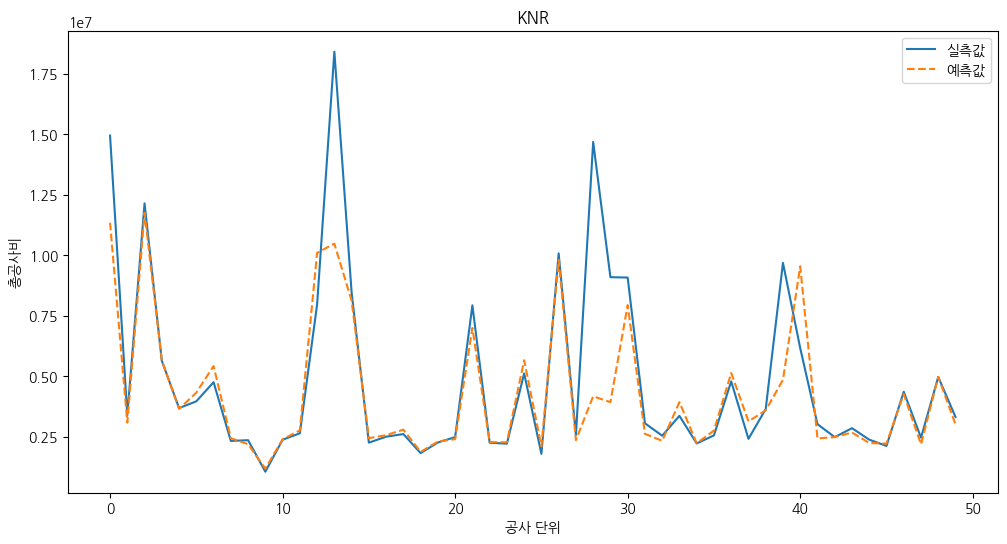

Evaluation: DTR
R2_SCORE: 0.369076, MAPE: 23.801207, MSE: 6217643913915.208008, RMSE: 2493520.385703, MAE: 1172876.377690


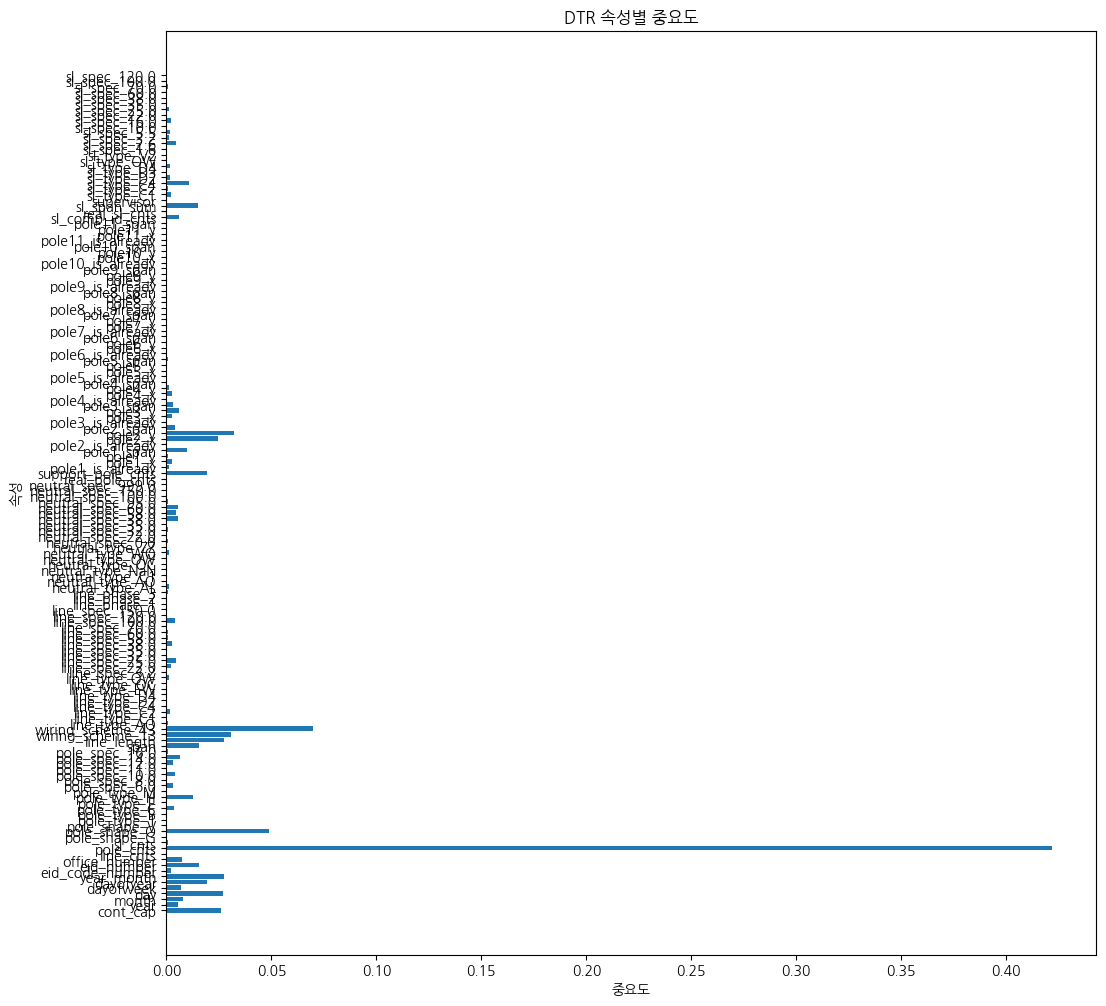

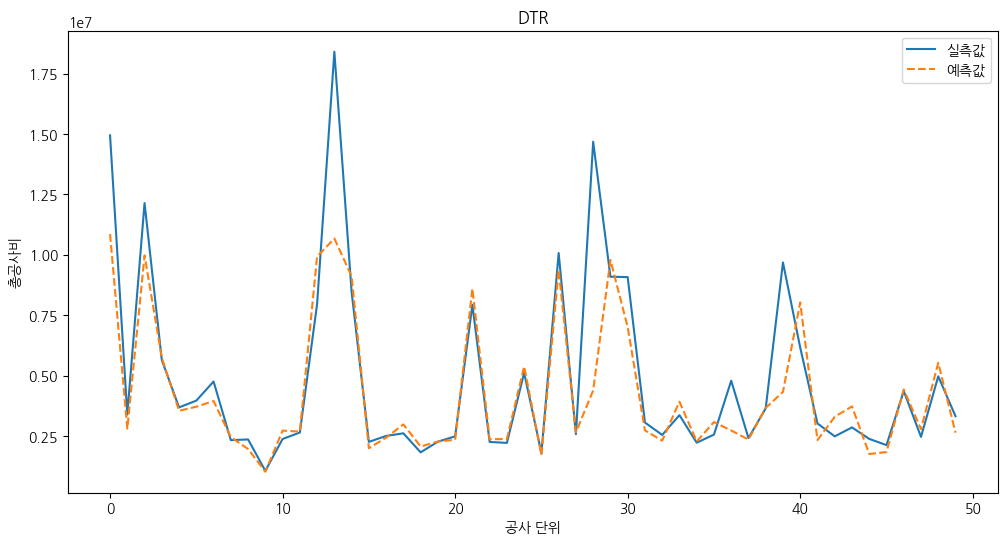

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Evaluation: RFR
R2_SCORE: 0.663373, MAPE: 17.973155, MSE: 3317404869104.918945, RMSE: 1821374.445057, MAE: 876769.982484


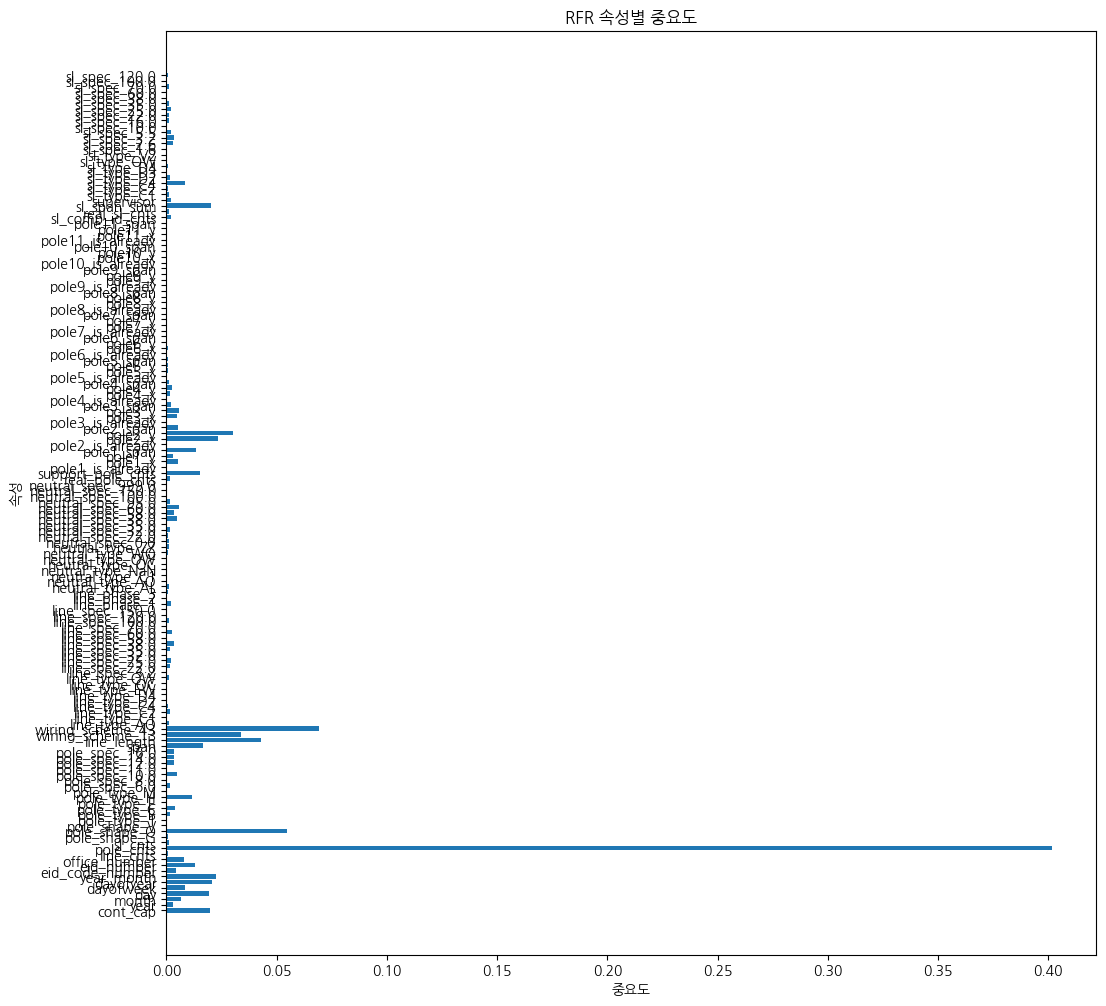

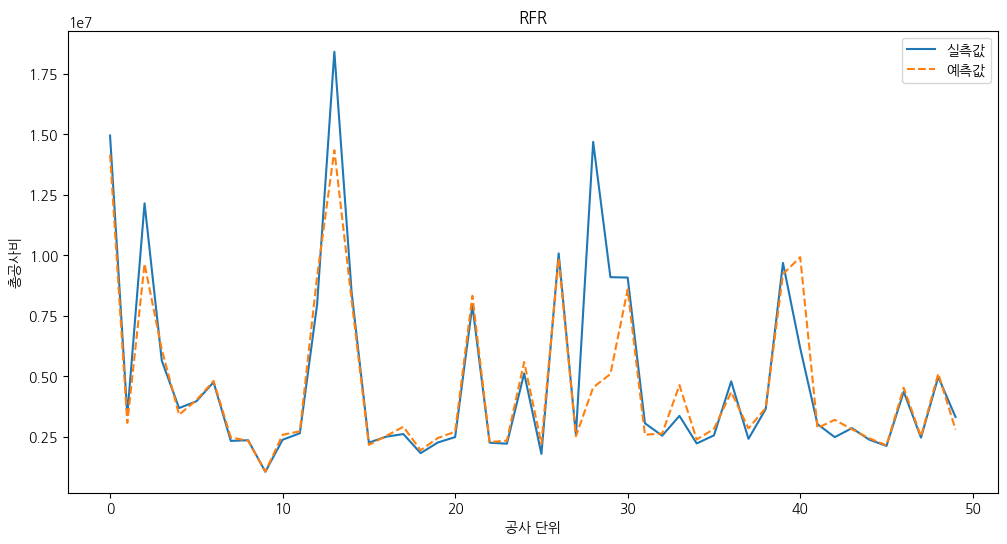

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation: GBR
R2_SCORE: 0.687612, MAPE: 17.211494, MSE: 3078533783612.595703, RMSE: 1754575.100591, MAE: 844912.533033


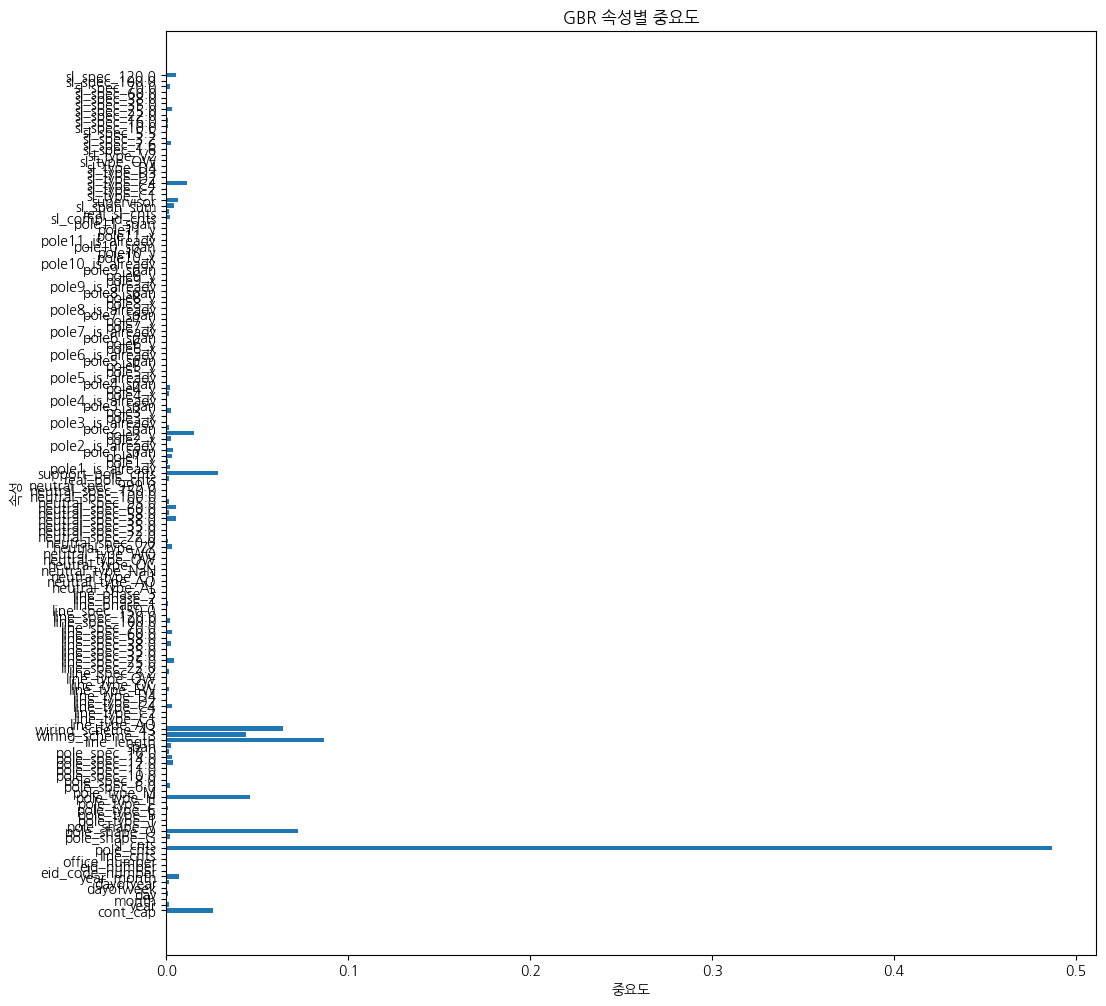

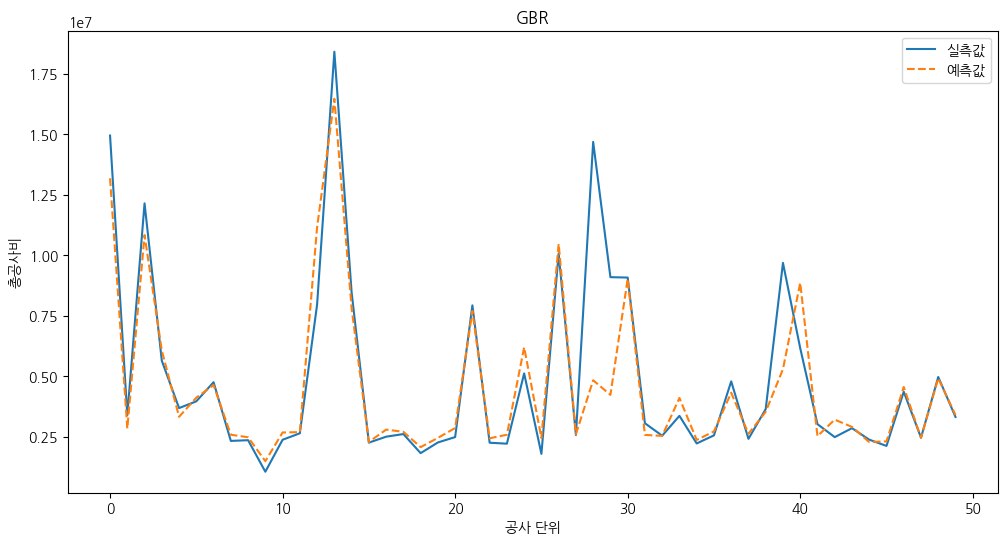

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+16, tolerance: 8.511e+12
  model = cd_fast.enet_coordinate_descent(


Evaluation: EN
R2_SCORE: 0.681939, MAPE: 17.821441, MSE: 3134437619420.999512, RMSE: 1770434.302487, MAE: 870417.426931
`EN` object has no attribute `feature_importances_`


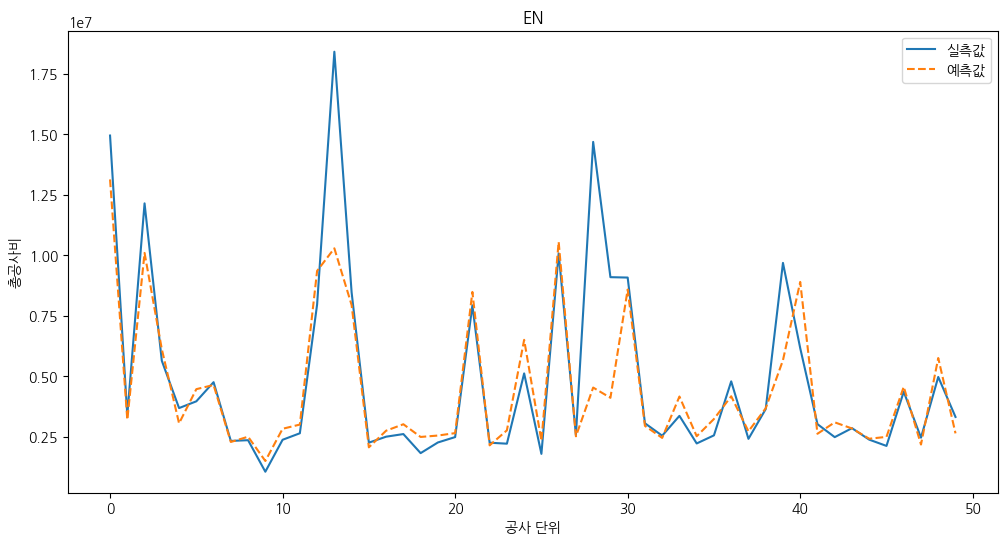

Evaluation: XGR
R2_SCORE: 0.293406, MAPE: 33.434485, MSE: 6963361334630.924805, RMSE: 2638818.170059, MAE: 1662013.607515


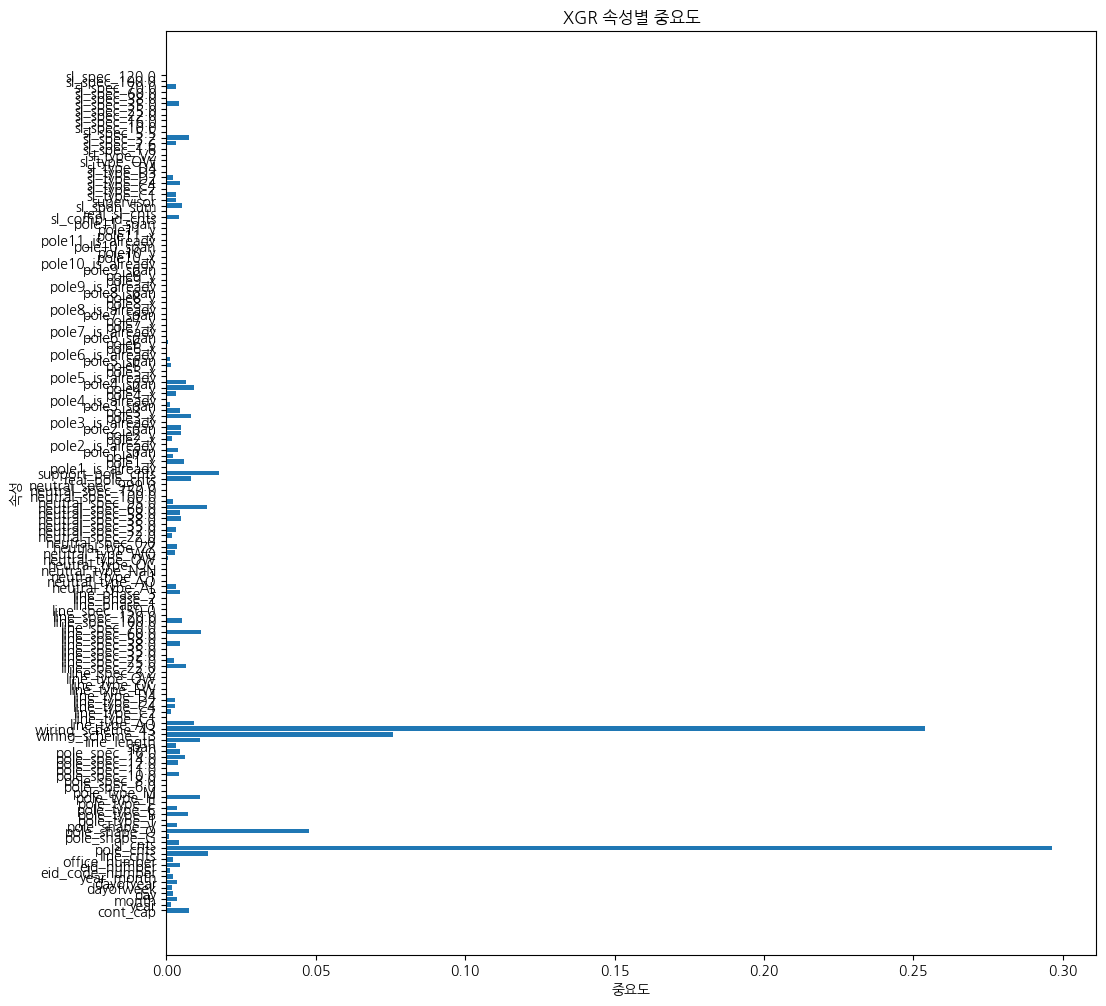

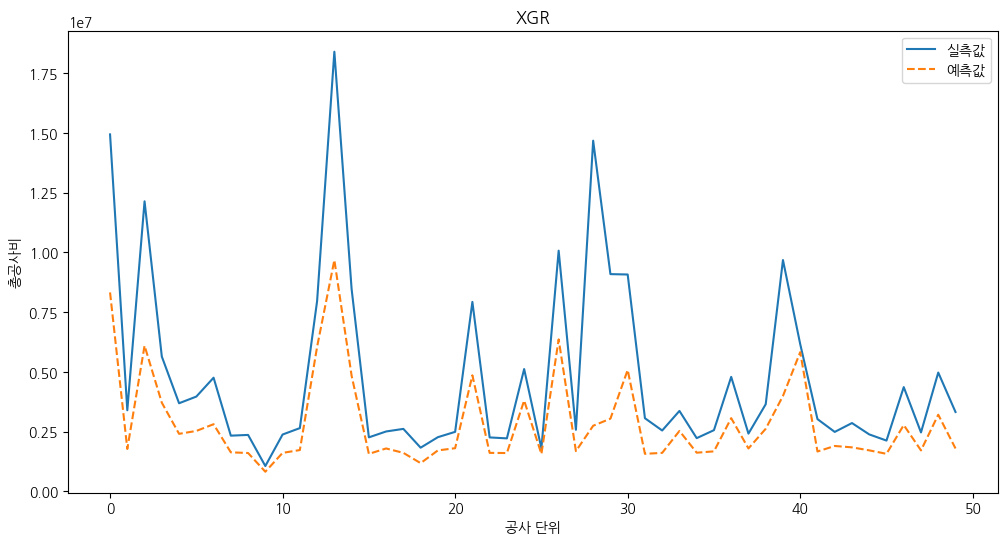

In [7]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [8]:
df_evaluation

,r2score,mape,mse,rmse,mae
LIN,-3.537258e+23,1.309080e+10,3.485906e+36,1.867058e+18,4.327476e+16
LASSO,6.798809e-01,1.789502e-01,3.154718e+12,1.776153e+06,8.713809e+05
RIDGE,6.792636e-01,1.786012e-01,3.160802e+12,1.777864e+06,8.706749e+05
KNR,5.662611e-01,1.919483e-01,4.274422e+12,2.067468e+06,9.874423e+05
DTR,3.690763e-01,2.380121e-01,6.217644e+12,2.493520e+06,1.172876e+06
RFR,6.633726e-01,1.797315e-01,3.317405e+12,1.821374e+06,8.767700e+05
GBR,6.876116e-01,1.721149e-01,3.078534e+12,1.754575e+06,8.449125e+05
EN,6.819389e-01,1.782144e-01,3.134438e+12,1.770434e+06,8.704174e+05
XGR,2.934060e-01,3.343449e-01,6.963361e+12,2.638818e+06,1.662014e+06
